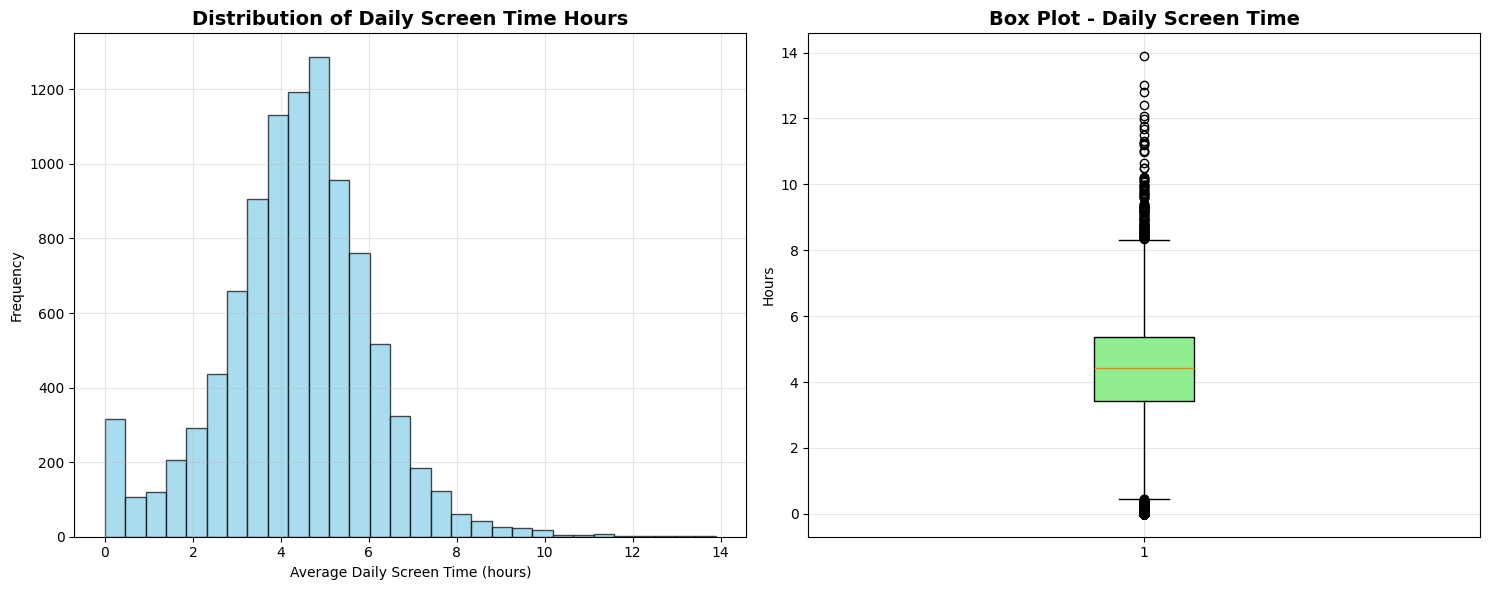

Daily Screen Time Statistics:
Mean: 4.35 hours
Median: 4.44 hours
Standard Deviation: 1.72 hours
Min: 0.00 hours
Max: 13.89 hours


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('/content/Clean_Screen_Time_Data_.csv')


fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# Histogram
axes[0].hist(df['Avg_Daily_Screen_Time_hr'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Daily Screen Time Hours', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Average Daily Screen Time (hours)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df['Avg_Daily_Screen_Time_hr'], patch_artist=True,
                boxprops=dict(facecolor='lightgreen', color='black'))
axes[1].set_title('Box Plot - Daily Screen Time', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Hours')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# descriptive statistics
print("Daily Screen Time Statistics:")
print(f"Mean: {df['Avg_Daily_Screen_Time_hr'].mean():.2f} hours")
print(f"Median: {df['Avg_Daily_Screen_Time_hr'].median():.2f} hours")
print(f"Standard Deviation: {df['Avg_Daily_Screen_Time_hr'].std():.2f} hours")
print(f"Min: {df['Avg_Daily_Screen_Time_hr'].min():.2f} hours")
print(f"Max: {df['Avg_Daily_Screen_Time_hr'].max():.2f} hours")


/tmp/ipython-input-2408992570.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Age_Group', y='Avg_Daily_Screen_Time_hr', ax=axes[2], palette='pastel')


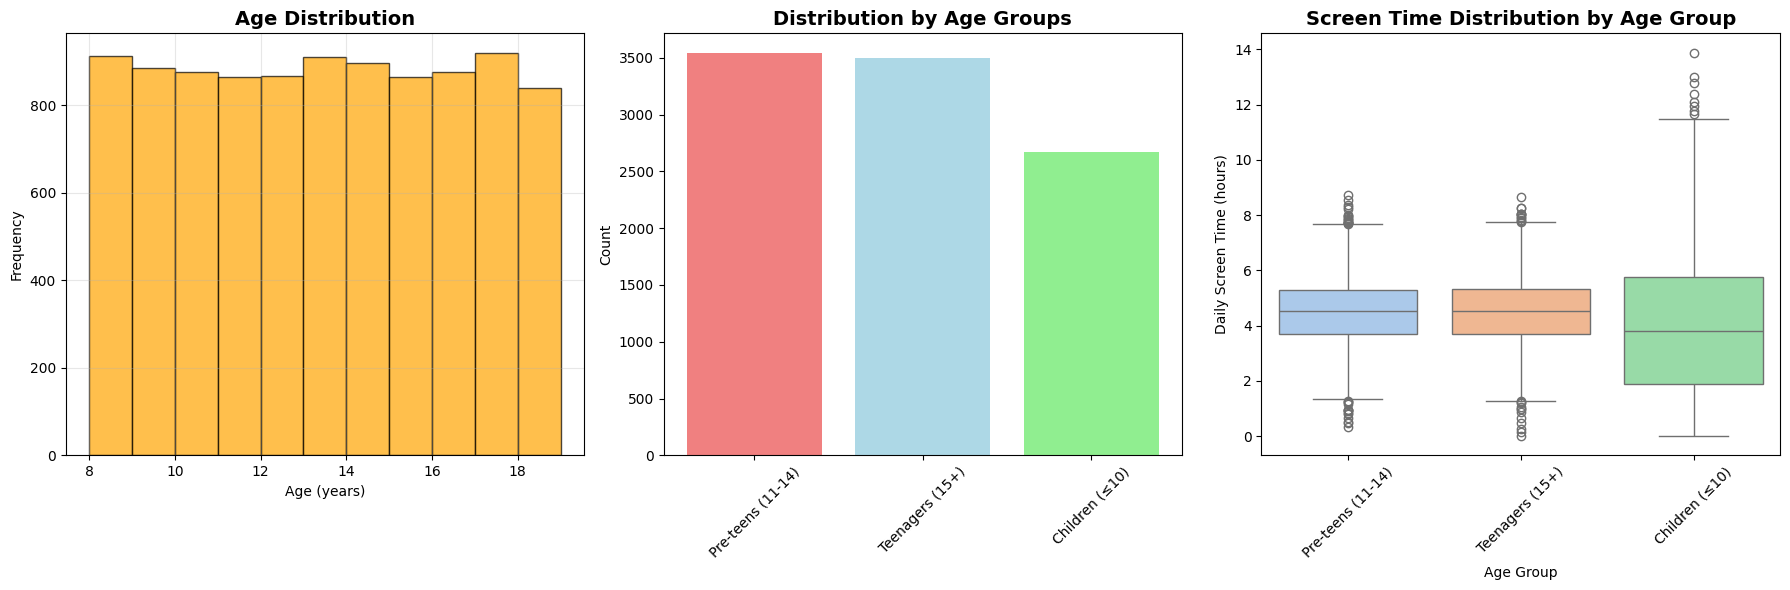


Age Group Statistics:
Pre-teens (11-14):
  Mean: 4.52 hours
  Count: 3539 children
  Standard Deviation: 1.20 hours
Teenagers (15+):
  Mean: 4.51 hours
  Count: 3499 children
  Standard Deviation: 1.20 hours
Children (≤10):
  Mean: 3.93 hours
  Count: 2674 children
  Standard Deviation: 2.59 hours


In [ ]:

# 2. Age Groups Distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- 1️ Age distribution histogram ---
axes[0].hist(df['Age'], bins=range(8, 20), alpha=0.7, color='orange', edgecolor='black')
axes[0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age (years)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# --- 2️ Age groups bar chart ---
age_group_counts = df['Age_Group'].value_counts()
axes[1].bar(age_group_counts.index, age_group_counts.values,
            color=['lightcoral', 'lightblue', 'lightgreen', 'lightyellow'])
axes[1].set_title('Distribution by Age Groups', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# --- 3️ Screen time by age groups - Box plot ---
sns.boxplot(data=df, x='Age_Group', y='Avg_Daily_Screen_Time_hr', ax=axes[2], palette='pastel')
axes[2].set_title('Screen Time Distribution by Age Group', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Age Group')
axes[2].set_ylabel('Daily Screen Time (hours)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# --- Summary statistics for each age group ---
print("\nAge Group Statistics:")
for group in df['Age_Group'].unique():
    group_data = df[df['Age_Group'] == group]['Avg_Daily_Screen_Time_hr']
    print(f"{group}:")
    print(f"  Mean: {group_data.mean():.2f} hours")
    print(f"  Count: {len(group_data)} children")
    print(f"  Standard Deviation: {group_data.std():.2f} hours")


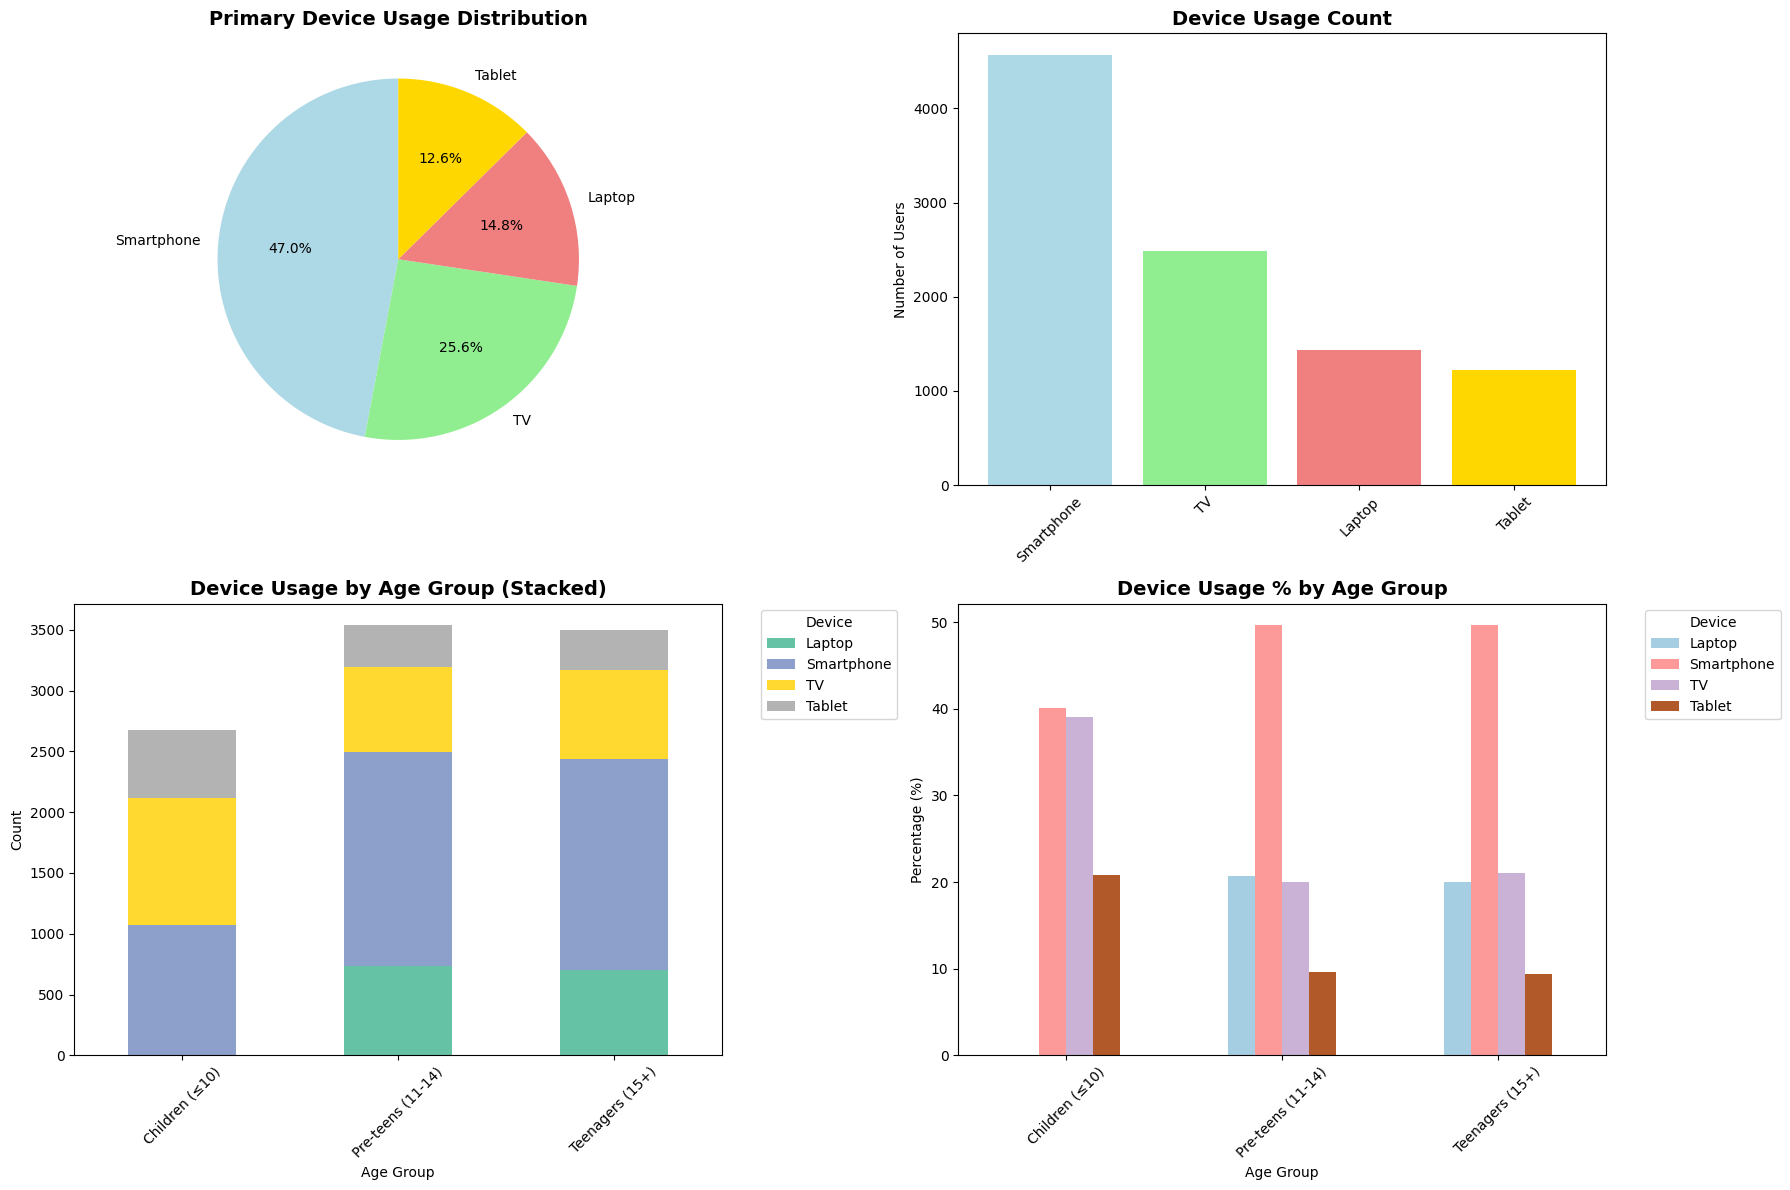


Device Usage Statistics:
Smartphone:
  Users: 4568
  Average Screen Time: 4.39 hours
  Percentage of Users: 47.0%
Laptop:
  Users: 1433
  Average Screen Time: 4.46 hours
  Percentage of Users: 14.8%
TV:
  Users: 2487
  Average Screen Time: 4.29 hours
  Percentage of Users: 25.6%
Tablet:
  Users: 1224
  Average Screen Time: 4.23 hours
  Percentage of Users: 12.6%


In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
# --- Device usage pie chart ---
device_counts = df['Primary_Device'].value_counts()
axes[0, 0].pie(device_counts.values,
               labels=device_counts.index,
               autopct='%1.1f%%',
               startangle=90,
               colors=['lightblue', 'lightgreen', 'lightcoral', 'gold'])
axes[0, 0].set_title('Primary Device Usage Distribution', fontsize=14, fontweight='bold')

axes[0, 1].bar(device_counts.index, device_counts.values,
               color=['lightblue', 'lightgreen', 'lightcoral', 'gold'])
axes[0, 1].set_title('Device Usage Count', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Number of Users')
axes[0, 1].tick_params(axis='x', rotation=45)

# ---  Device usage by age group (Stacked bar) ---
device_age_crosstab = pd.crosstab(df['Age_Group'], df['Primary_Device'])
device_age_crosstab.plot(kind='bar', stacked=True, ax=axes[1, 0], colormap='Set2')
axes[1, 0].set_title('Device Usage by Age Group (Stacked)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(title='Device', bbox_to_anchor=(1.05, 1), loc='upper left')

# --- Device usage % by age group ---
device_age_pct = pd.crosstab(df['Age_Group'], df['Primary_Device'], normalize='index') * 100
device_age_pct.plot(kind='bar', ax=axes[1, 1], colormap='Paired')
axes[1, 1].set_title('Device Usage % by Age Group', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Percentage (%)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(title='Device', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# --- Device statistics ---
print("\nDevice Usage Statistics:")
for device in df['Primary_Device'].unique():
    device_data = df[df['Primary_Device'] == device]['Avg_Daily_Screen_Time_hr']
    print(f"{device}:")
    print(f"  Users: {len(device_data)}")
    print(f"  Average Screen Time: {device_data.mean():.2f} hours")
    print(f"  Percentage of Users: {len(device_data)/len(df)*100:.1f}%")


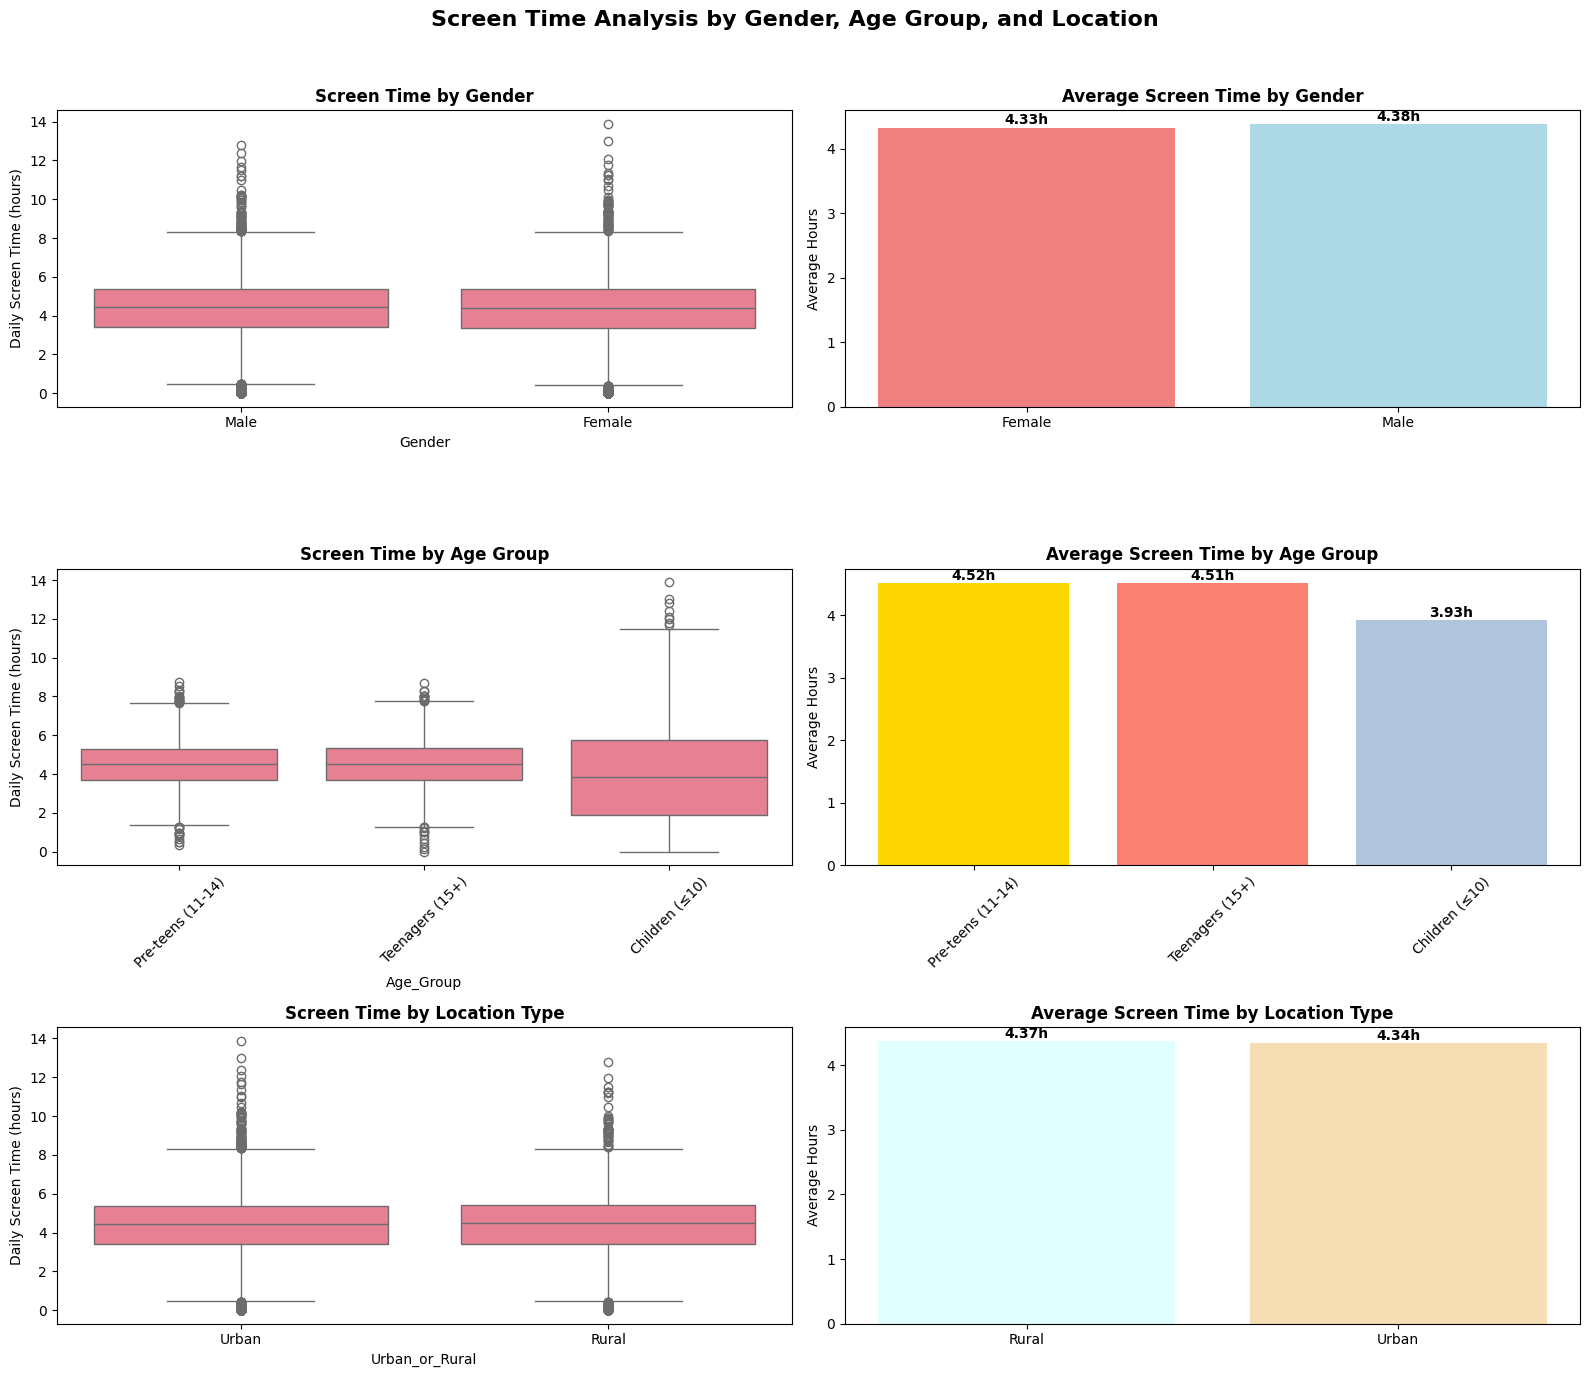

In [ ]:

plt.style.use('default')
sns.set_palette("husl")


fig, axes = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle('Screen Time Analysis by Gender, Age Group, and Location', fontsize=16, fontweight='bold')

# ---  Gender Distribution ---
sns.boxplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', ax=axes[0, 0])
axes[0, 0].set_title('Screen Time by Gender', fontweight='bold')
axes[0, 0].set_ylabel('Daily Screen Time (hours)')

gender_avg = df.groupby('Gender')['Avg_Daily_Screen_Time_hr'].mean()
axes[0, 1].bar(gender_avg.index, gender_avg.values, color=['lightcoral', 'lightblue'])
axes[0, 1].set_title('Average Screen Time by Gender', fontweight='bold')
axes[0, 1].set_ylabel('Average Hours')
for i, v in enumerate(gender_avg.values):
    axes[0, 1].text(i, v + 0.05, f'{v:.2f}h', ha='center', fontweight='bold')

# ---  Age Group Distribution ---
sns.boxplot(data=df, x='Age_Group', y='Avg_Daily_Screen_Time_hr', ax=axes[1, 0])
axes[1, 0].set_title('Screen Time by Age Group', fontweight='bold')
axes[1, 0].set_ylabel('Daily Screen Time (hours)')
axes[1, 0].tick_params(axis='x', rotation=45)

age_avg = df.groupby('Age_Group')['Avg_Daily_Screen_Time_hr'].mean().sort_values(ascending=False)
axes[1, 1].bar(age_avg.index, age_avg.values, color=['gold', 'salmon', 'lightsteelblue'])
axes[1, 1].set_title('Average Screen Time by Age Group', fontweight='bold')
axes[1, 1].set_ylabel('Average Hours')
axes[1, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(age_avg.values):
    axes[1, 1].text(i, v + 0.05, f'{v:.2f}h', ha='center', fontweight='bold')

# ---  Location Type Distribution ---
sns.boxplot(data=df, x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', ax=axes[2, 0])
axes[2, 0].set_title('Screen Time by Location Type', fontweight='bold')
axes[2, 0].set_ylabel('Daily Screen Time (hours)')

location_avg = df.groupby('Urban_or_Rural')['Avg_Daily_Screen_Time_hr'].mean()
axes[2, 1].bar(location_avg.index, location_avg.values, color=['lightcyan', 'wheat'])
axes[2, 1].set_title('Average Screen Time by Location Type', fontweight='bold')
axes[2, 1].set_ylabel('Average Hours')
for i, v in enumerate(location_avg.values):
    axes[2, 1].text(i, v + 0.05, f'{v:.2f}h', ha='center', fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for title
plt.show()
